In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.simplefilter("ignore")

In [2]:
def get_data(year):
    df =pd.read_excel('c:/python/china/CN/IO'+year+'.xlsx',sheet_name='Table',usecols='D:AXE',nrows=1302,skiprows=lambda x: x<3, engine='openpyxl')
    if year!='2017':
        mm=np.array(df)
        for num in range(31):
            zz=mm[num*42+22]
            for x in range(23,36):
                mm[num*42+x-1]=mm[num*42+x]
            mm[num*42+35]=zz
        for num in range(31):
            zz=mm[:,num*42+22]
            for x in range(23,36):
                mm[:,num*42+x-1]=mm[:,num*42+x]
            mm[:,num*42+35]=zz
        df1=pd.DataFrame(mm,columns=df.columns)
        return df1
    else:
        return df
    
            
    

In [3]:
maufactories=np.array([1,2,11,14,23,24,27,28,29])
maufactories1=np.array([0,1,2,11,14,23,24,27,28,29])
maufactories0=np.array([1,2,11,14,24,25,28,29,30])
maufactories01=np.array([0,1,2,11,14,24,25,28,29,30])
res=np.array(list(map(lambda x: x+1 if x in maufactories-1 else 0, np.arange(1302)%42)))
regions=np.arange(1302)//42+1


In [4]:
mas=[]
co2=[]
for yr in [2012,2015,2017]:
    maufs1=maufactories01
    if yr==2017:
        maufs1=maufactories1
    year=str(yr)
    print(year)
    df=pd.read_excel('c:/python/china/CN/IO'+year+'.xlsx',sheet_name='Table',usecols='D:AXE',nrows=1302,skiprows=lambda x: x<3, engine='openpyxl')
    for reg in range(1,32):
        if reg !=26:
            mas.append([np.array(df[df.columns[(regions==reg)&(res==el)]]).sum() for el in maufs1]+[yr-2012,1,reg])
    co2 =co2+list(np.array(pd.read_excel('c:/python/china/CN/co2.xls',sheet_name=year,usecols='C:AF',nrows=5))[-1].reshape(-1,1))
    
    

2012
2015
2017


In [5]:
koef=np.array([0.001]*len(maufactories1))
koef

array([0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001,
       0.001])

In [6]:
mas=np.array(mas)
mas1=mas[:,:-3]*np.exp(-np.ones(mas[:,:-3].shape)*koef*(mas[:,-3].reshape(-1,1)))

In [7]:
mdl=LR(fit_intercept=False,positive=True).fit(mas1,co2)
list(zip(maufactories1,mdl.coef_[0]))

[(0, 0.0),
 (1, 5.827401049821465e-06),
 (2, 3.5533112393658e-05),
 (11, 6.218642340074856e-06),
 (14, 7.726087093345798e-07),
 (23, 0.0),
 (24, 2.421124688211246e-06),
 (27, 6.393270491307453e-07),
 (28, 2.5281840810169254e-06),
 (29, 0.0)]

In [8]:
mser=mse(co2,mdl.predict(mas1))
print(mser)
print(np.array(list(zip(maufactories1,mdl.coef_[0]))))


15579.18410581504
[[0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 5.82740105e-06]
 [2.00000000e+00 3.55331124e-05]
 [1.10000000e+01 6.21864234e-06]
 [1.40000000e+01 7.72608709e-07]
 [2.30000000e+01 0.00000000e+00]
 [2.40000000e+01 2.42112469e-06]
 [2.70000000e+01 6.39327049e-07]
 [2.80000000e+01 2.52818408e-06]
 [2.90000000e+01 0.00000000e+00]]


In [9]:
ii=0
ii1=10*100000
for posx in range(5):
    for pos in range(100000):
        kkk=0.000999*ii/ii1
        ii+=1
        tek=np.random.randint(len(koef))
        koef1=koef.copy()
        koef1[tek]=koef1[tek]*(1.001-kkk)
        if koef1[tek]>0.1:
            koef1[tek]=0.1
        mas2=mas[:,:-3]*np.exp(-np.ones(mas[:,:-3].shape)*koef1*(mas[:,-3].reshape(-1,1)))
        mdl1=LR(fit_intercept=False,positive=True).fit(mas2,co2)
        mser1=mse(co2,mdl1.predict(mas2))
        koef2=koef.copy()
        koef2[tek]=koef2[tek]*(0.999+kkk)
        mas3=mas[:,:-3]*np.exp(-np.ones(mas[:,:-3].shape)*koef2*(mas[:,-3].reshape(-1,1)))
        mdl2=LR(fit_intercept=False,positive=True).fit(mas3,co2)
        mser2=mse(co2,mdl2.predict(mas3))
        if mser1<mser:
            mser=mser1
            mdl=mdl1
            koef=koef1
        if mser2<mser:
            mser=mser2
            mdl=mdl2
            koef=koef2
    print(posx,mser)
    print(koef)
    print(np.array(list(zip(maufactories1,mdl.coef_[0]))))


0 14459.95885336939
[1.71767086e-03 7.67661076e-02 8.03515427e-08 1.00000000e-01
 1.00000000e-01 1.00000000e-03 1.56838097e-03 1.00000000e-01
 1.00000000e-01 1.31741151e-03]
[[0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.12220832e-06]
 [2.00000000e+00 3.56966185e-05]
 [1.10000000e+01 7.04394121e-06]
 [1.40000000e+01 5.55579050e-07]
 [2.30000000e+01 0.00000000e+00]
 [2.40000000e+01 4.97548006e-06]
 [2.70000000e+01 1.06271628e-06]
 [2.80000000e+01 2.98402240e-06]
 [2.90000000e+01 5.06566473e-07]]
1 14459.957473914254
[2.41408247e-03 7.67661076e-02 1.62600236e-11 1.00000000e-01
 1.00000000e-01 1.00000000e-03 1.99839913e-03 1.00000000e-01
 1.00000000e-01 1.70955038e-03]
[[0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 7.12220867e-06]
 [2.00000000e+00 3.56966099e-05]
 [1.10000000e+01 7.04394162e-06]
 [1.40000000e+01 5.55579266e-07]
 [2.30000000e+01 0.00000000e+00]
 [2.40000000e+01 4.98618908e-06]
 [2.70000000e+01 1.06271615e-06]
 [2.80000000e+01 2.98402274e-06]
 [2.90000000e+01 5.0755

In [10]:
otr=['Other','AFAHF','MWC', 'PPCNF','SPM', 'RMPME', 'EPHP', 'C', 'WRT', 'TSPS']
decr=[1,0.2,0.3,0.2,0.3,1,0.32,0.45,0.4,0.35]

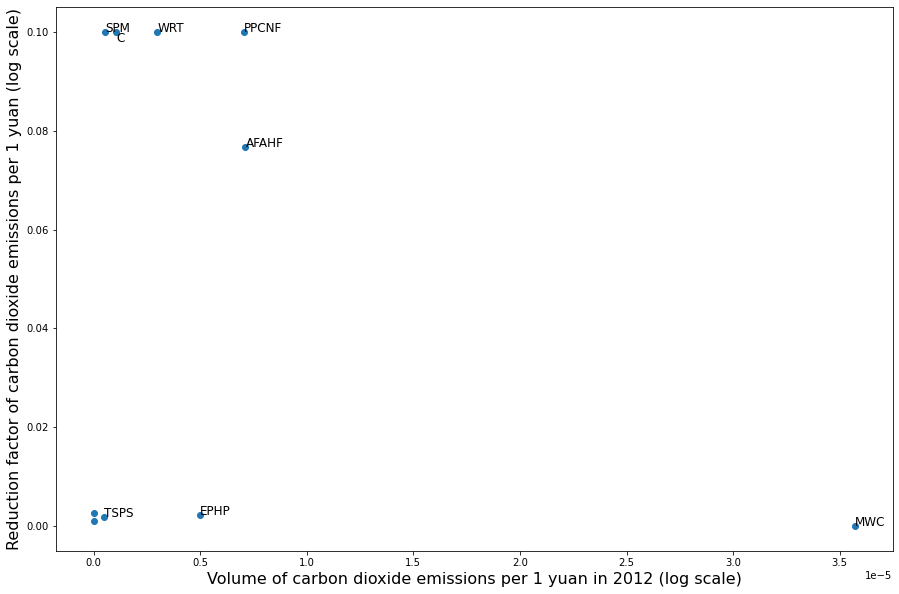

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(mdl.coef_[0],koef)
for el in range(len(koef)):
    if (koef[el]>0.01) | (mdl.coef_[0][el]>1e-8):
        if otr[el]=='C':
            plt.text(mdl.coef_[0][el],koef[el]-0.002,otr[el],fontsize=12)
        else:
            plt.text(mdl.coef_[0][el],koef[el],otr[el],fontsize=12)
            
        
plt.xlabel('Volume of carbon dioxide emissions per 1 yuan in 2012 (log scale)',fontsize=16)
plt.ylabel('Reduction factor of carbon dioxide emissions per 1 yuan (log scale)',fontsize=16)
plt.show()

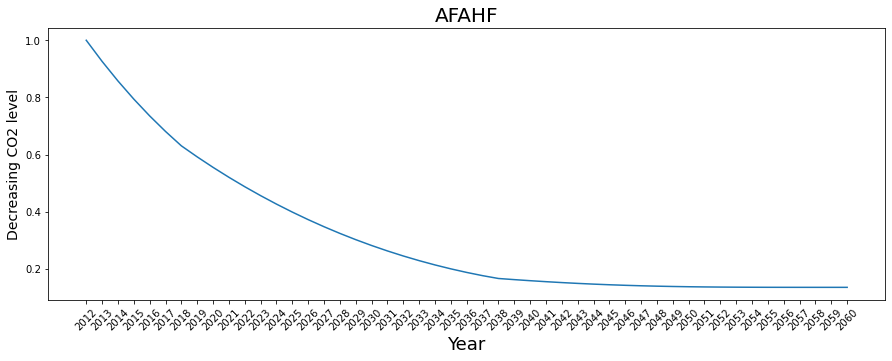

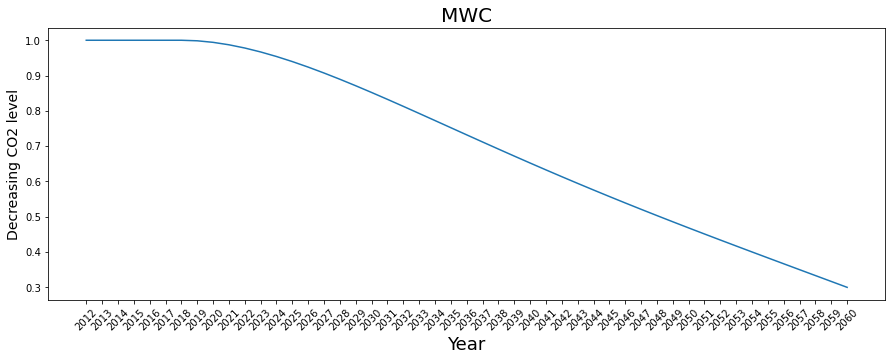

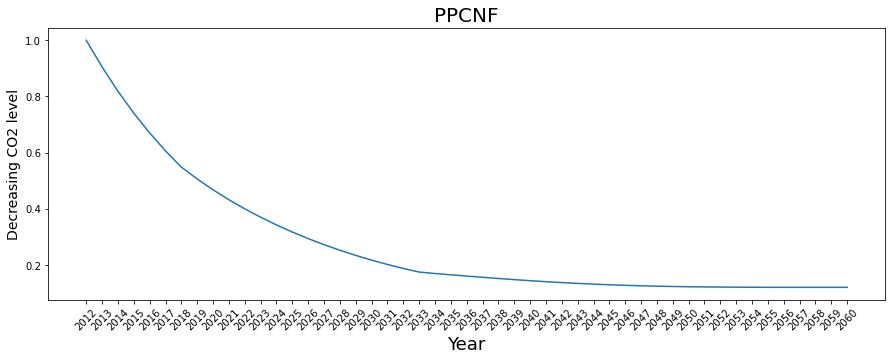

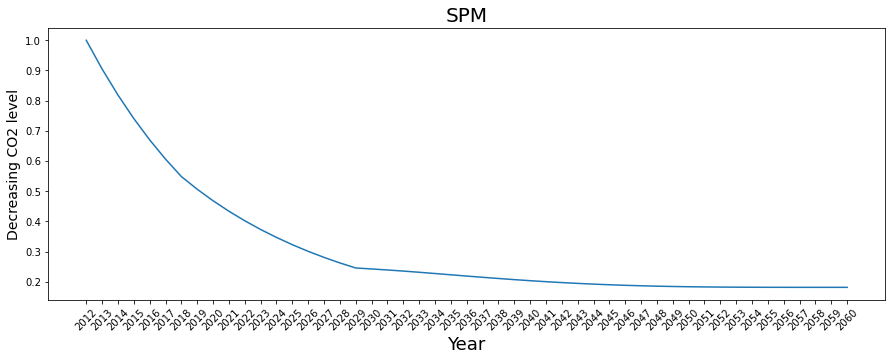

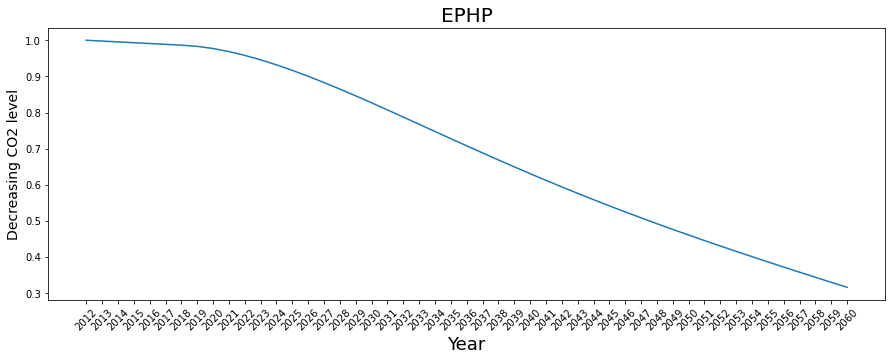

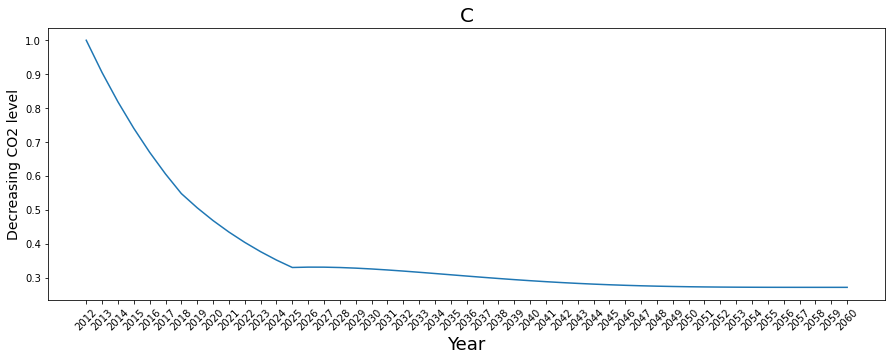

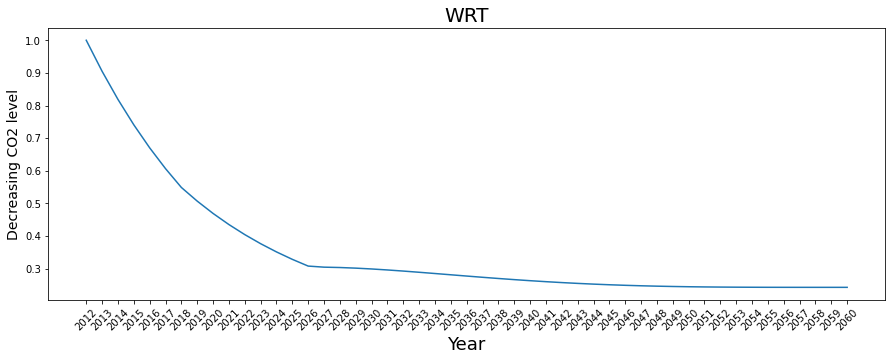

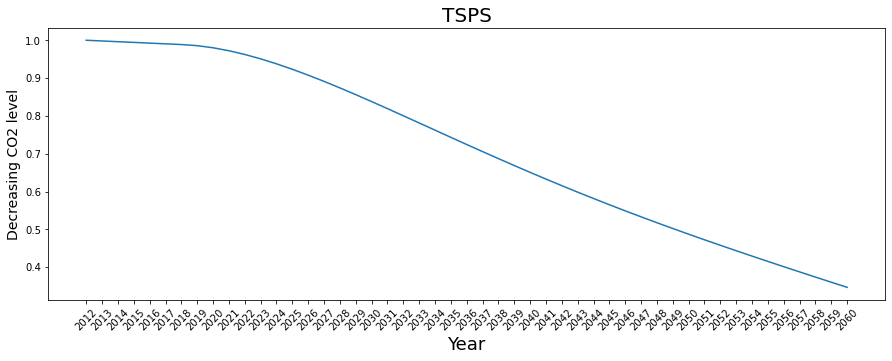

In [37]:
rrr=np.array(range(2012,2061))
rr1=np.array(range(2012,2018))
rr2=np.array(range(2018,2061))
proc=[]
for el in range(1,10):
    m1=np.exp(-koef[el]*(rr1-2012))
    dd=np.exp(-koef[el]*(2017-2012))*decr[el]
    k1=(2060-rr2)/(2060-2018)
    k2=(rr2-2018)/(2060-2018)
    k3=k1/(k1+k2)
    m2=np.array([dd if x<dd else x for x in np.exp(-koef[el]*(rr2-2012))])*k3+((1-dd)*k3**4+dd)*(1-k3)
    
    proc.append(list(m1)+list(m2))
    if el !=5:
        plt.figure(figsize=(15,5))
        plt.plot(rrr,proc[-1])
        plt.xlabel('Year',fontsize=18)
        plt.ylabel('Decreasing CO2 level',fontsize=14)
        plt.title(otr[el],fontsize=20)
        plt.xticks(rrr,rrr,rotation=45)

In [44]:
proc=np.array(proc)

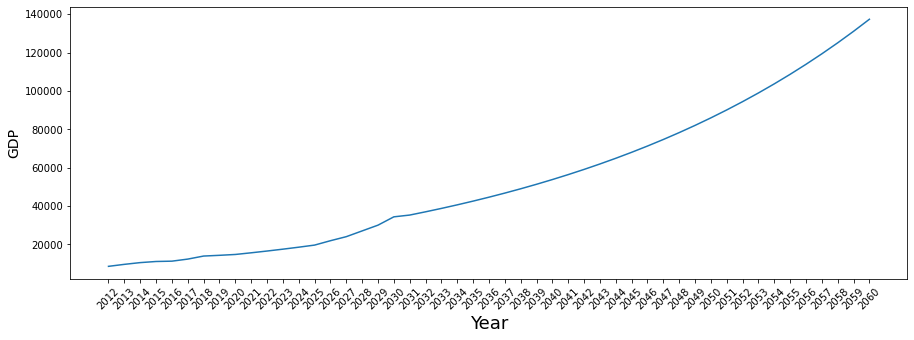

In [46]:
GDP=[8532, 9570, 10475, 11062, 11233, 12310, 13895, 14280, 14723, 15591, 16511, 17485, 18517, 19610, 21890, 24000, 27000,
     30000, 34338, 35262, 36955, 38728, 40587, 42536, 44577, 46717, 48959, 51309, 53772, 56353, 59058, 61893, 64864, 67977,
     71240, 74660, 78244, 81999, 85935, 90060, 94383, 98913, 103661, 108637, 113852, 119316, 125044, 131046, 137336]
plt.figure(figsize=(15,5))
plt.plot(rrr,GDP)
plt.xlabel('Year',fontsize=18)
plt.ylabel('GDP',fontsize=14)
plt.xticks(rrr,rrr,rotation=45)
plt.show()

In [48]:
ffdict=dict()

ffdict['2012']=get_data('2012')
#pd.read_excel('c:/python/china/CN/IO2012.xlsx',sheet_name='Table',usecols='D:AXE',nrows=1302,skiprows=lambda x: x<3, engine='openpyxl')
ffdict['2015']=get_data('2015')
#pd.read_excel('c:/python/china/CN/IO2015.xlsx',sheet_name='Table',usecols='D:AXE',nrows=1302,skiprows=lambda x: x<3, engine='openpyxl')
ffdict['2017']=get_data('2017')
#pd.read_excel('c:/python/china/CN/IO2017.xlsx',sheet_name='Table',usecols='D:AXE',nrows=1302,skiprows=lambda x: x<3, engine='openpyxl')


In [104]:
def get_predict(year):
    mas2012=np.array(ffdict['2012'])
    mas2015=np.array(ffdict['2015'])
    mas2017=np.array(ffdict['2017'])
    xx=[[2012],[2015],[2017]]
    masyear=np.zeros(mas2012.shape)
    for x in range(len(mas2012)):
        for y in range(len(mas2012)):
            if (mas2017[x,y]==mas2012[x,y]) & (mas2017[x,y]==mas2015[x,y]):
                masyear[x,y]=mas2017[x,y]
            elif mas2017[x,y]<mas2012[x,y]:
                yy=[np.log(mas2012[x,y]+1),np.log(mas2015[x,y]+1),np.log(mas2017[x,y]+1)]
                masyear[x,y]=np.exp(LR().fit(xx,yy).predict([[year]]))[0]-1
            else:
                yy=[mas2012[x,y],mas2015[x,y],mas2017[x,y]]
                masyear[x,y]=LR().fit(xx,yy).predict([[year]])[0]
    T=np.sum(masyear)
    #print(T)
    return pd.DataFrame(masyear/T*GDP[year-2012]*1e6,columns=ffdict['2012'].columns)
    

In [106]:
ffdict['2040']=get_predict(2040)


In [107]:
ffdict['2060']=get_predict(2060)


In [108]:
def get_co2(year):
    coefs=np.zeros(42)
    coefs2=np.zeros(42)
    for num,el in enumerate(maufactories):
        coefs[el-1]=mdl.coef_[0][num]
        coefs2[el-1]=koef[num]
    t=year
    cmas=np.array(list(proc[num,t-2012]*coefs)*31)
    df =ffdict[str(year)]*cmas
    #pd.read_excel('c:/python/china/CN/IO'+str(t)+'.xlsx',sheet_name='Table',usecols='D:AXE',nrows=1302,skiprows=lambda x: x<3, engine='openpyxl')*cmas
    return df

In [109]:
dfdict=dict()
dfdict['2012']=get_co2(2012)
dfdict['2015']=get_co2(2015)
dfdict['2017']=get_co2(2017)
dfdict['2040']=get_co2(2040)
dfdict['2060']=get_co2(2060)

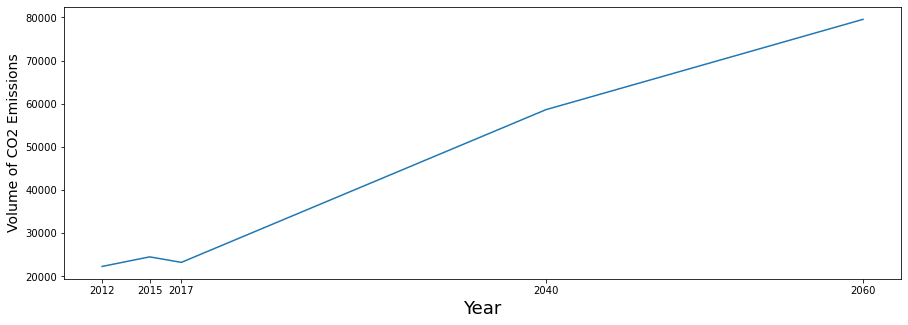

In [117]:
plt.figure(figsize=(15,5))
mm=[2012,2015,2017,2040,2060]
plt.plot(mm,[dfdict[str(el)].sum().sum() for el in mm])
plt.xlabel('Year',fontsize=18)
plt.ylabel('Volume of CO2 Emissions',fontsize=14)
plt.xticks(mm,mm)
plt.show()

In [118]:
regions=np.arange(1302)//42
mans=np.arange(1302)%42
mans

array([ 0,  1,  2, ..., 39, 40, 41], dtype=int32)

In [119]:
nregions=['Beijing','Tianjin','Hebei','Shanxi','Inter-Mongolia','Liaoning','Jilin','HeiLongjiang','Shanghai','Jiangsu',
         'Zhejiang','Anhi','Fujian','Jiangxi','Shandong','Hennan','Hubei','Hunan','Guangdong','Guangxi','Hainan','Chongqing',
         'Sichuan','Guizhou','Yunnan','XiZang-Tibet','Shaanxi','Gansu','Qinghai','Ningxia','Xinjiang']
industries=['AFAHF','MWC','EPNG','MPMO','NPNOO','FTP','TI','MLFFFRP','PTF','MPPACESA','PPCNF','MCP','MNMMP','SPM',
            'MMP','MGPM','MSPM','MTE','MEME','MCECOEE','MMI','OMWR','RMPME','EPHP','PDG',
            'PDTW','C','WRT','TSPS','AC','ITSITS','F','RE','LCS','SR','PS','AWEPF','RROS','E',
            'HCSW','CSE','PASISO']


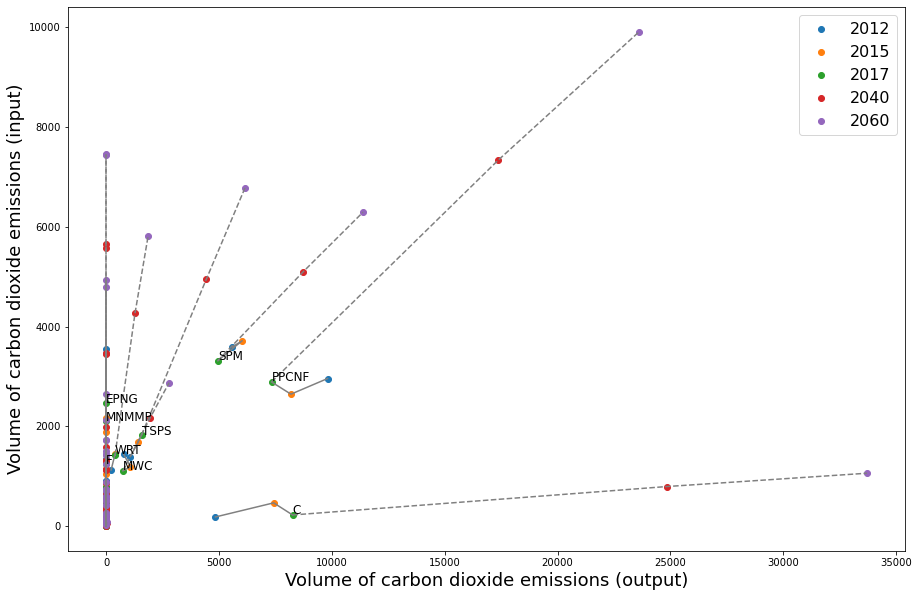

In [121]:
df2012in=[dfdict['2012'].sum(axis=1)[mans==el].sum() for el in range(42)]
df2012out=[dfdict['2012'].sum(axis=0)[mans==el].sum() for el in range(42)]
df2015in=[dfdict['2015'].sum(axis=1)[mans==el].sum() for el in range(42)]
df2015out=[dfdict['2015'].sum(axis=0)[mans==el].sum() for el in range(42)]
df2017in=[dfdict['2017'].sum(axis=1)[mans==el].sum() for el in range(42)]
df2017out=[dfdict['2017'].sum(axis=0)[mans==el].sum() for el in range(42)]
df2040in=[dfdict['2040'].sum(axis=1)[mans==el].sum() for el in range(42)]
df2040out=[dfdict['2040'].sum(axis=0)[mans==el].sum() for el in range(42)]
df2060in=[dfdict['2060'].sum(axis=1)[mans==el].sum() for el in range(42)]
df2060out=[dfdict['2060'].sum(axis=0)[mans==el].sum() for el in range(42)]
plt.figure(figsize=(15,10))
plt.scatter(df2012out,df2012in)
plt.scatter(df2015out,df2015in)
plt.scatter(df2017out,df2017in)
plt.scatter(df2040out,df2040in)
plt.scatter(df2060out,df2060in)
plt.legend([2012,2015,2017,2040,2060],fontsize=16)
for el in range(42):
    plt.plot([df2012out[el],df2015out[el],df2017out[el]],
             [df2012in[el],df2015in[el],df2017in[el]],color='gray')
    plt.plot([df2017out[el],df2040out[el],df2060out[el]],
             [df2017in[el],df2040in[el],df2060in[el]],'--',color='gray')
    if (df2017out[el]>10) | (df2017in[el]>1000):
        plt.text(df2017out[el],df2017in[el]+10,industries[el],fontsize=12)
#for el in range(len(koef)):
#    if (koef[el]>0.005) | (mdl.coef_[0][el]>1.4e-6):
#        plt.text(mdl.coef_[0][el],koef[el]+1e-4,otr[el],fontsize=12)
        
plt.xlabel('Volume of carbon dioxide emissions (output)',fontsize=18)
plt.ylabel('Volume of carbon dioxide emissions (input)',fontsize=18)
plt.show()

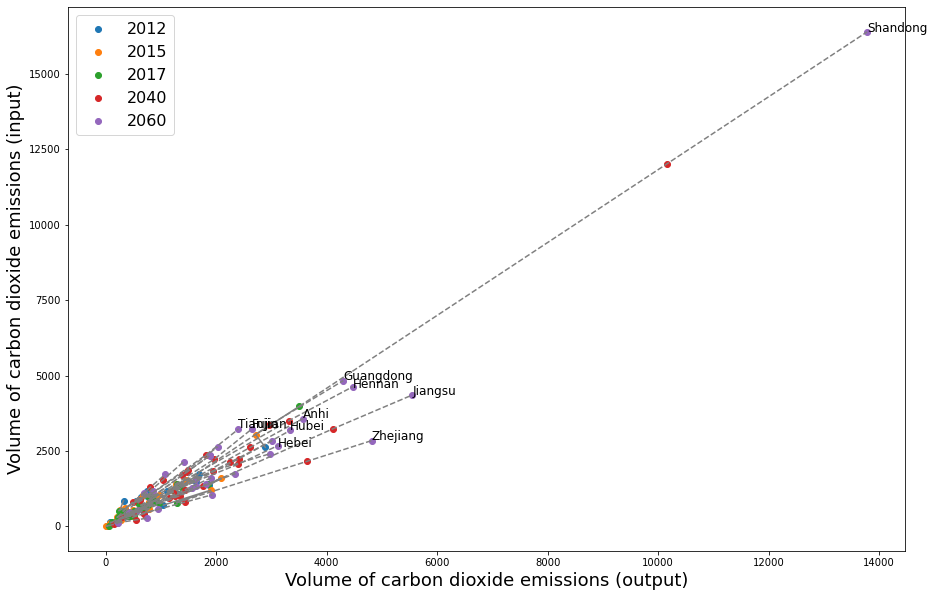

In [126]:
df2012in=[dfdict['2012'].sum(axis=1)[regions==el].sum() for el in range(31)]
df2012out=[dfdict['2012'].sum(axis=0)[regions==el].sum() for el in range(31)]
df2015in=[dfdict['2015'].sum(axis=1)[regions==el].sum() for el in range(31)]
df2015out=[dfdict['2015'].sum(axis=0)[regions==el].sum() for el in range(31)]
df2017in=[dfdict['2017'].sum(axis=1)[regions==el].sum() for el in range(31)]
df2017out=[dfdict['2017'].sum(axis=0)[regions==el].sum() for el in range(31)]
df2040in=[dfdict['2040'].sum(axis=1)[regions==el].sum() for el in range(31)]
df2040out=[dfdict['2040'].sum(axis=0)[regions==el].sum() for el in range(31)]
df2060in=[dfdict['2060'].sum(axis=1)[regions==el].sum() for el in range(31)]
df2060out=[dfdict['2060'].sum(axis=0)[regions==el].sum() for el in range(31)]
plt.figure(figsize=(15,10))
plt.scatter(df2012out,df2012in)
plt.scatter(df2015out,df2015in)
plt.scatter(df2017out,df2017in)
plt.scatter(df2040out,df2040in)
plt.scatter(df2060out,df2060in)
plt.legend([2012,2015,2017,2040,2060],fontsize=16)
for el in range(31):
    kk=0
    if el in [5,2,15,26]:
        kk=-50
    elif el in [1]:
        kk=40
    plt.plot([df2012out[el],df2015out[el],df2017out[el]],[df2012in[el],df2015in[el],df2017in[el]],color='gray')
    plt.plot([df2017out[el],df2040out[el],df2060out[el]],
             [df2017in[el],df2040in[el],df2060in[el]],'--',color='gray')
    if (df2060out[el]>3000) | (df2060in[el]>3000):# | ((df2017out[el]<200) & (df2017in[el]>200)):
        plt.text(df2060out[el],df2060in[el]+10+kk,nregions[el],fontsize=12)
#for el in range(len(koef)):
#    if (koef[el]>0.005) | (mdl.coef_[0][el]>1.4e-6):
#        plt.text(mdl.coef_[0][el],koef[el]+1e-4,otr[el],fontsize=12)
        
plt.xlabel('Volume of carbon dioxide emissions (output)',fontsize=18)
plt.ylabel('Volume of carbon dioxide emissions (input)',fontsize=18)
plt.show()

In [124]:
def get_entropy(mm0):
    T=np.sum(mm0)
    mmX=np.sum(mm0,axis=0)
    mmY=np.sum(mm0,axis=1)

    X=np.nan_to_num(mm0/T*np.log2(mm0*T/mmX/mmY.reshape(-1,1)))
    X=np.array(list(map(lambda x: list(map(lambda y: 0 if y>1 else y, x)),X)))
    Psi=-np.nan_to_num(mm0/T*np.log2(mm0*mm0/mmX/mmY.reshape(-1,1)))
    Psi=np.array(list(map(lambda x: list(map(lambda y: 0 if y<-1 else y, x)),Psi)))
    return X,Psi

In [127]:
X2012,Psi2012=get_entropy(np.array(dfdict['2012']))
X2015,Psi2015=get_entropy(np.array(dfdict['2015']))
X2017,Psi2017=get_entropy(np.array(dfdict['2017']))
X2040,Psi2040=get_entropy(np.array(dfdict['2040']))
X2060,Psi2060=get_entropy(np.array(dfdict['2060']))


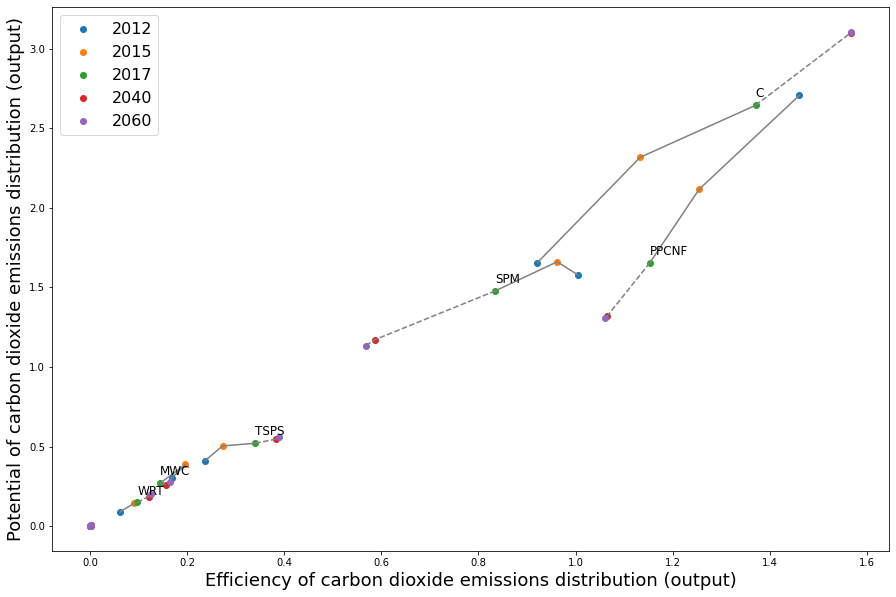

In [128]:
df2012in=[Psi2012.sum(axis=0)[mans==el].sum() for el in range(42)]
df2012out=[X2012.sum(axis=0)[mans==el].sum() for el in range(42)]
df2015in=[Psi2015.sum(axis=0)[mans==el].sum() for el in range(42)]
df2015out=[X2015.sum(axis=0)[mans==el].sum() for el in range(42)]
df2017in=[Psi2017.sum(axis=0)[mans==el].sum() for el in range(42)]
df2017out=[X2017.sum(axis=0)[mans==el].sum() for el in range(42)]
df2040in=[Psi2040.sum(axis=0)[mans==el].sum() for el in range(42)]
df2040out=[X2040.sum(axis=0)[mans==el].sum() for el in range(42)]
df2060in=[Psi2060.sum(axis=0)[mans==el].sum() for el in range(42)]
df2060out=[X2060.sum(axis=0)[mans==el].sum() for el in range(42)]
plt.figure(figsize=(15,10))
plt.scatter(df2012out,df2012in)
plt.scatter(df2015out,df2015in)
plt.scatter(df2017out,df2017in)
plt.scatter(df2040out,df2040in)
plt.scatter(df2060out,df2060in)
plt.legend([2012,2015,2017,2040,2060],fontsize=16)
for el in range(42):
    plt.plot([df2012out[el],df2015out[el],df2017out[el]],[df2012in[el],df2015in[el],df2017in[el]],color='gray')
    plt.plot([df2017out[el],df2040out[el],df2060out[el]],
             [df2017in[el],df2040in[el],df2060in[el]],'--',color='gray')
    if (df2017out[el]>0.01) | (df2017in[el]>0.01):
        plt.text(df2017out[el],df2017in[el]+0.05,industries[el],fontsize=12)
#for el in range(len(koef)):
#    if (koef[el]>0.005) | (mdl.coef_[0][el]>1.4e-6):
#        plt.text(mdl.coef_[0][el],koef[el]+1e-4,otr[el],fontsize=12)
        
plt.xlabel('Efficiency of carbon dioxide emissions distribution (output)',fontsize=18)
plt.ylabel('Potential of carbon dioxide emissions distribution (output)',fontsize=18)
plt.show()

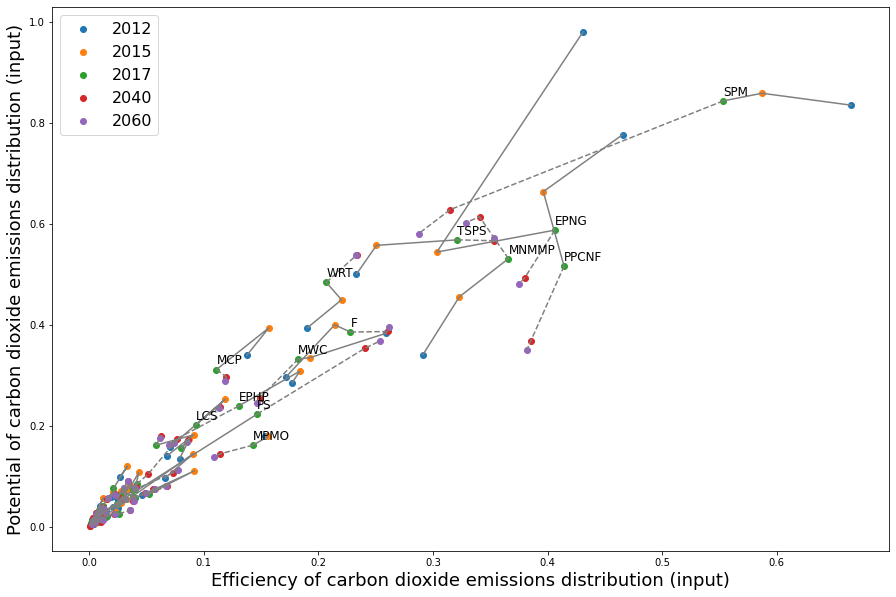

In [131]:
df2012in=[Psi2012.sum(axis=1)[mans==el].sum() for el in range(42)]
df2012out=[X2012.sum(axis=1)[mans==el].sum() for el in range(42)]
df2015in=[Psi2015.sum(axis=1)[mans==el].sum() for el in range(42)]
df2015out=[X2015.sum(axis=1)[mans==el].sum() for el in range(42)]
df2017in=[Psi2017.sum(axis=1)[mans==el].sum() for el in range(42)]
df2017out=[X2017.sum(axis=1)[mans==el].sum() for el in range(42)]
df2040in=[Psi2040.sum(axis=1)[mans==el].sum() for el in range(42)]
df2040out=[X2040.sum(axis=1)[mans==el].sum() for el in range(42)]
df2060in=[Psi2060.sum(axis=1)[mans==el].sum() for el in range(42)]
df2060out=[X2060.sum(axis=1)[mans==el].sum() for el in range(42)]
plt.figure(figsize=(15,10))
plt.scatter(df2012out,df2012in)
plt.scatter(df2015out,df2015in)
plt.scatter(df2017out,df2017in)
plt.scatter(df2040out,df2040in)
plt.scatter(df2060out,df2060in)
plt.legend([2012,2015,2017,2040,2060],fontsize=16)
for el in range(42):
    plt.plot([df2012out[el],df2015out[el],df2017out[el]],[df2012in[el],df2015in[el],df2017in[el]],color='gray')
    plt.plot([df2017out[el],df2040out[el],df2060out[el]],
             [df2017in[el],df2040in[el],df2060in[el]],'--',color='gray')
    if (df2017out[el]>0.1) | (df2017in[el]>0.2):
        plt.text(df2017out[el],df2017in[el]+0.01,industries[el],fontsize=12)
#for el in range(len(koef)):
#    if (koef[el]>0.005) | (mdl.coef_[0][el]>1.4e-6):
#        plt.text(mdl.coef_[0][el],koef[el]+1e-4,otr[el],fontsize=12)
        
plt.xlabel('Efficiency of carbon dioxide emissions distribution (input)',fontsize=18)
plt.ylabel('Potential of carbon dioxide emissions distribution (input)',fontsize=18)
plt.show()

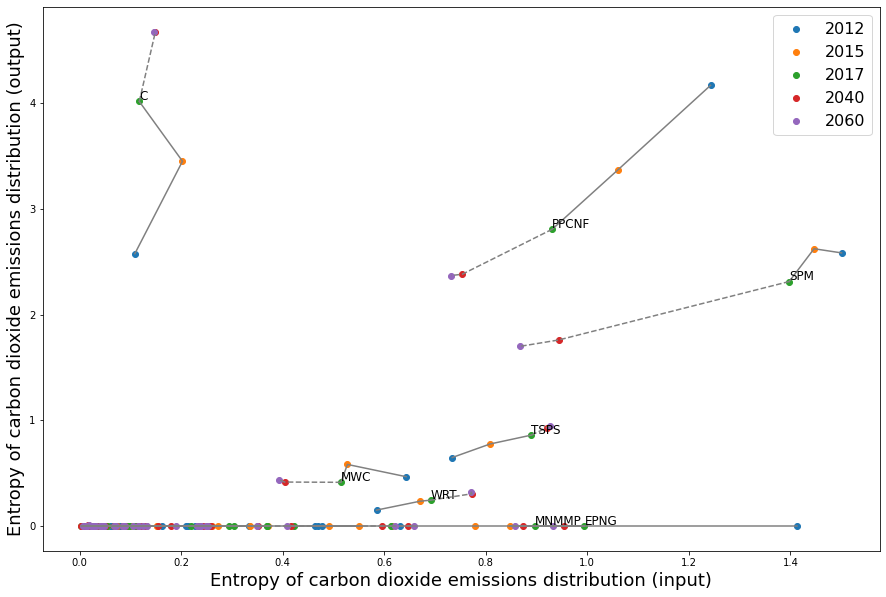

In [132]:
df2012in=[(X2012+Psi2012).sum(axis=0)[mans==el].sum() for el in range(42)]
df2012out=[(X2012+Psi2012).sum(axis=1)[mans==el].sum() for el in range(42)]
df2015in=[(X2015+Psi2015).sum(axis=0)[mans==el].sum() for el in range(42)]
df2015out=[(X2015+Psi2015).sum(axis=1)[mans==el].sum() for el in range(42)]
df2017in=[(X2017+Psi2017).sum(axis=0)[mans==el].sum() for el in range(42)]
df2017out=[(X2017+Psi2017).sum(axis=1)[mans==el].sum() for el in range(42)]
df2040in=[(X2040+Psi2040).sum(axis=0)[mans==el].sum() for el in range(42)]
df2040out=[(X2040+Psi2040).sum(axis=1)[mans==el].sum() for el in range(42)]
df2060in=[(X2060+Psi2060).sum(axis=0)[mans==el].sum() for el in range(42)]
df2060out=[(X2060+Psi2060).sum(axis=1)[mans==el].sum() for el in range(42)]
plt.figure(figsize=(15,10))
plt.scatter(df2012out,df2012in)
plt.scatter(df2015out,df2015in)
plt.scatter(df2017out,df2017in)
plt.scatter(df2040out,df2040in)
plt.scatter(df2060out,df2060in)
plt.legend([2012,2015,2017,2040,2060],fontsize=16)
for el in range(42):
    plt.plot([df2012out[el],df2015out[el],df2017out[el]],[df2012in[el],df2015in[el],df2017in[el]],color='gray')
    plt.plot([df2017out[el],df2040out[el],df2060out[el]],
             [df2017in[el],df2040in[el],df2060in[el]],'--',color='gray')
    if (df2017out[el]>0.75) | (df2017in[el]>0.1):
        plt.text(df2017out[el],df2017in[el]+0.01,industries[el],fontsize=12)
#for el in range(len(koef)):
#    if (koef[el]>0.005) | (mdl.coef_[0][el]>1.4e-6):
#        plt.text(mdl.coef_[0][el],koef[el]+1e-4,otr[el],fontsize=12)
        
plt.xlabel('Entropy of carbon dioxide emissions distribution (input)',fontsize=18)
plt.ylabel('Entropy of carbon dioxide emissions distribution (output)',fontsize=18)
plt.show()

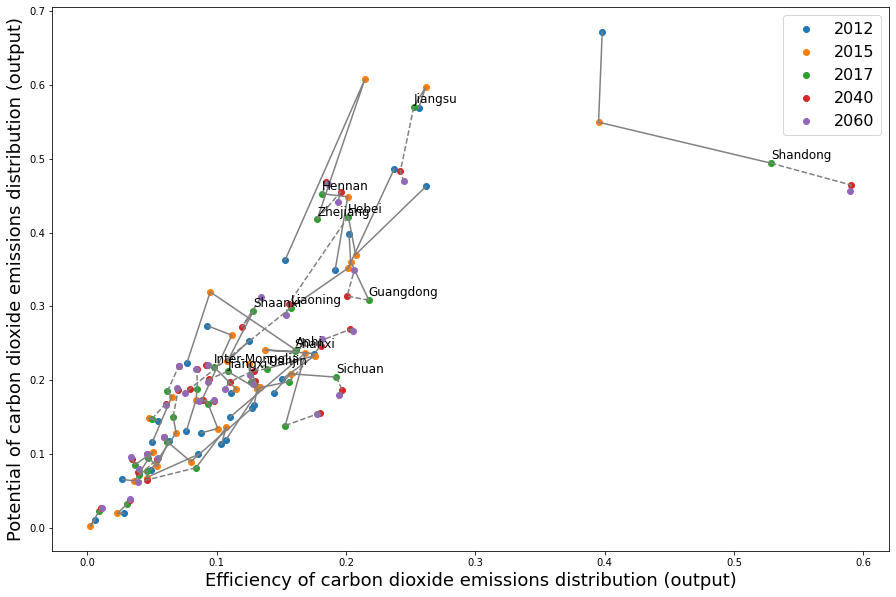

In [133]:
df2012in=[Psi2012.sum(axis=0)[regions==el].sum() for el in range(31)]
df2012out=[X2012.sum(axis=0)[regions==el].sum() for el in range(31)]
df2015in=[Psi2015.sum(axis=0)[regions==el].sum() for el in range(31)]
df2015out=[X2015.sum(axis=0)[regions==el].sum() for el in range(31)]
df2017in=[Psi2017.sum(axis=0)[regions==el].sum() for el in range(31)]
df2017out=[X2017.sum(axis=0)[regions==el].sum() for el in range(31)]
df2040in=[Psi2040.sum(axis=0)[regions==el].sum() for el in range(31)]
df2040out=[X2040.sum(axis=0)[regions==el].sum() for el in range(31)]
df2060in=[Psi2060.sum(axis=0)[regions==el].sum() for el in range(31)]
df2060out=[X2060.sum(axis=0)[regions==el].sum() for el in range(31)]
plt.figure(figsize=(15,10))
plt.scatter(df2012out,df2012in)
plt.scatter(df2015out,df2015in)
plt.scatter(df2017out,df2017in)
plt.scatter(df2040out,df2040in)
plt.scatter(df2060out,df2060in)
plt.legend([2012,2015,2017,2040,2060],fontsize=16)
for el in range(31):
    plt.plot([df2012out[el],df2015out[el],df2017out[el]],[df2012in[el],df2015in[el],df2017in[el]],color='gray')
    plt.plot([df2017out[el],df2040out[el],df2060out[el]],
             [df2017in[el],df2040in[el],df2060in[el]],'--',color='gray')
    if (df2017out[el]>0.2) | (df2017in[el]>0.2):
        plt.text(df2017out[el],df2017in[el]+0.005,nregions[el],fontsize=12)
#for el in range(len(koef)):
#    if (koef[el]>0.005) | (mdl.coef_[0][el]>1.4e-6):
#        plt.text(mdl.coef_[0][el],koef[el]+1e-4,otr[el],fontsize=12)
        
plt.xlabel('Efficiency of carbon dioxide emissions distribution (output)',fontsize=18)
plt.ylabel('Potential of carbon dioxide emissions distribution (output)',fontsize=18)
plt.show()

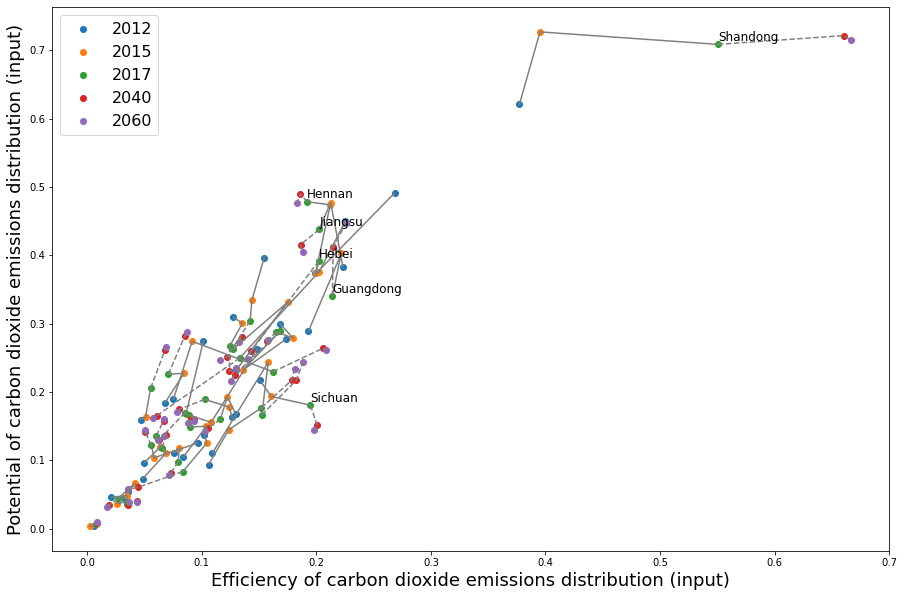

In [134]:
df2012in=[Psi2012.sum(axis=1)[regions==el].sum() for el in range(31)]
df2012out=[X2012.sum(axis=1)[regions==el].sum() for el in range(31)]
df2015in=[Psi2015.sum(axis=1)[regions==el].sum() for el in range(31)]
df2015out=[X2015.sum(axis=1)[regions==el].sum() for el in range(31)]
df2017in=[Psi2017.sum(axis=1)[regions==el].sum() for el in range(31)]
df2017out=[X2017.sum(axis=1)[regions==el].sum() for el in range(31)]
df2040in=[Psi2040.sum(axis=1)[regions==el].sum() for el in range(31)]
df2040out=[X2040.sum(axis=1)[regions==el].sum() for el in range(31)]
df2060in=[Psi2060.sum(axis=1)[regions==el].sum() for el in range(31)]
df2060out=[X2060.sum(axis=1)[regions==el].sum() for el in range(31)]
plt.figure(figsize=(15,10))
plt.scatter(df2012out,df2012in)
plt.scatter(df2015out,df2015in)
plt.scatter(df2017out,df2017in)
plt.scatter(df2040out,df2040in)
plt.scatter(df2060out,df2060in)
plt.legend([2012,2015,2017,2040,2060],fontsize=16)
for el in range(31):
    plt.plot([df2012out[el],df2015out[el],df2017out[el]],[df2012in[el],df2015in[el],df2017in[el]],color='gray')
    plt.plot([df2017out[el],df2040out[el],df2060out[el]],
             [df2017in[el],df2040in[el],df2060in[el]],'--',color='gray')
    if (df2017out[el]>0.17) | (df2017in[el]>0.35):
        plt.text(df2017out[el],df2017in[el]+0.005,nregions[el],fontsize=12)
#for el in range(len(koef)):
#    if (koef[el]>0.005) | (mdl.coef_[0][el]>1.4e-6):
#        plt.text(mdl.coef_[0][el],koef[el]+1e-4,otr[el],fontsize=12)
        
plt.xlabel('Efficiency of carbon dioxide emissions distribution (input)',fontsize=18)
plt.ylabel('Potential of carbon dioxide emissions distribution (input)',fontsize=18)
plt.show()

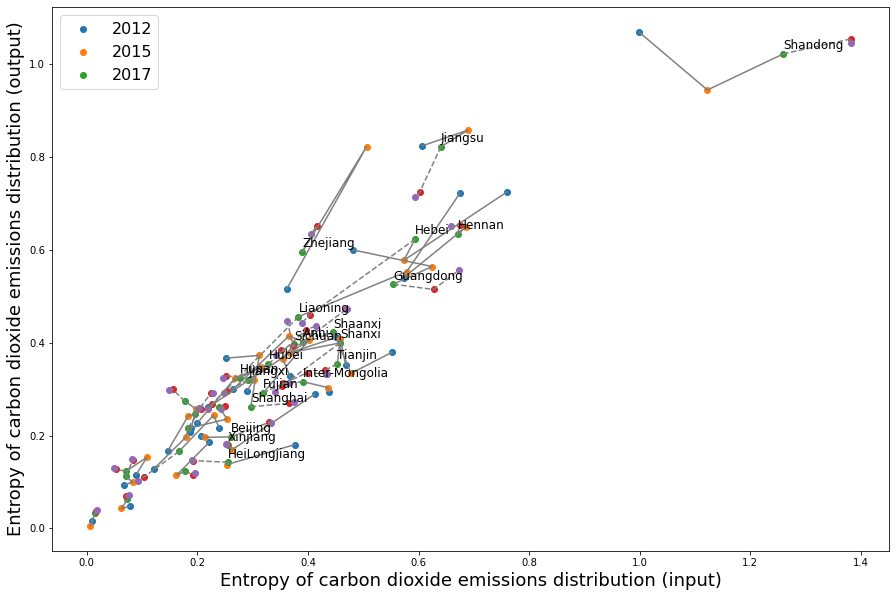

In [135]:
df2012in=[(X2012+Psi2012).sum(axis=0)[regions==el].sum() for el in range(31)]
df2012out=[(X2012+Psi2012).sum(axis=1)[regions==el].sum() for el in range(31)]
df2015in=[(X2015+Psi2015).sum(axis=0)[regions==el].sum() for el in range(31)]
df2015out=[(X2015+Psi2015).sum(axis=1)[regions==el].sum() for el in range(31)]
df2017in=[(X2017+Psi2017).sum(axis=0)[regions==el].sum() for el in range(31)]
df2017out=[(X2017+Psi2017).sum(axis=1)[regions==el].sum() for el in range(31)]
df2040in=[(X2040+Psi2040).sum(axis=0)[regions==el].sum() for el in range(31)]
df2040out=[(X2040+Psi2040).sum(axis=1)[regions==el].sum() for el in range(31)]
df2060in=[(X2060+Psi2060).sum(axis=0)[regions==el].sum() for el in range(31)]
df2060out=[(X2060+Psi2060).sum(axis=1)[regions==el].sum() for el in range(31)]
plt.figure(figsize=(15,10))
plt.scatter(df2012out,df2012in)
plt.scatter(df2015out,df2015in)
plt.scatter(df2017out,df2017in)
plt.scatter(df2040out,df2040in)
plt.scatter(df2060out,df2060in)
plt.legend([2012,2015,2017],fontsize=16)
for el in range(31):
    plt.plot([df2012out[el],df2015out[el],df2017out[el]],[df2012in[el],df2015in[el],df2017in[el]],color='gray')
    plt.plot([df2017out[el],df2040out[el],df2060out[el]],
             [df2017in[el],df2040in[el],df2060in[el]],'--',color='gray')
    if (df2017out[el]>0.25) | (df2017in[el]>0.4):
        plt.text(df2017out[el],df2017in[el]+0.01,nregions[el],fontsize=12)
#for el in range(len(koef)):
#    if (koef[el]>0.005) | (mdl.coef_[0][el]>1.4e-6):
#        plt.text(mdl.coef_[0][el],koef[el]+1e-4,otr[el],fontsize=12)
        
plt.xlabel('Entropy of carbon dioxide emissions distribution (input)',fontsize=18)
plt.ylabel('Entropy of carbon dioxide emissions distribution (output)',fontsize=18)
plt.show()

In [137]:
Xf2012,Psif2012=get_entropy(np.array(ffdict['2012']))
Xf2015,Psif2015=get_entropy(np.array(ffdict['2015']))
Xf2017,Psif2017=get_entropy(np.array(ffdict['2017']))
Xf2040,Psif2040=get_entropy(np.array(ffdict['2040']))
Xf2060,Psif2060=get_entropy(np.array(ffdict['2060']))

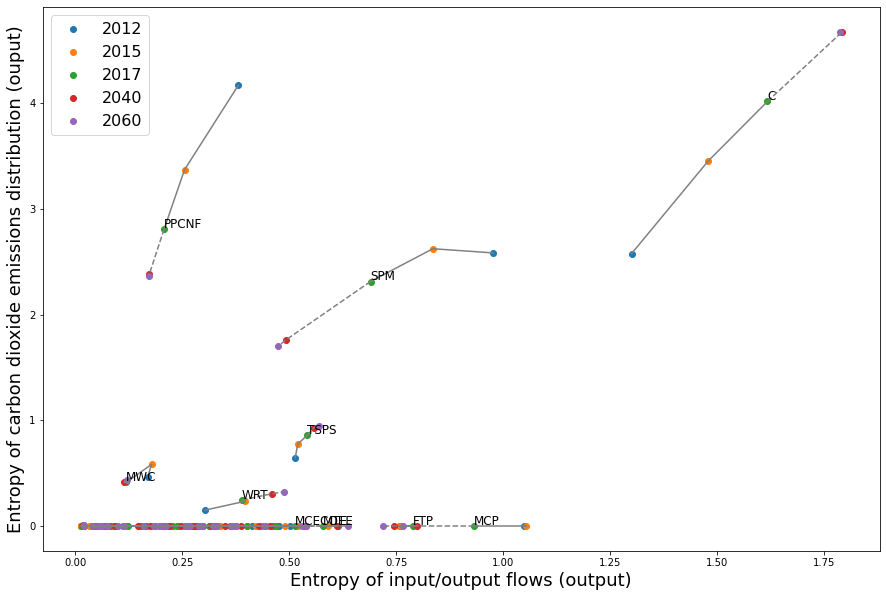

In [138]:
df2012in=[(X2012+Psi2012).sum(axis=0)[mans==el].sum() for el in range(42)]
df2012out=[(Xf2012+Psif2012).sum(axis=0)[mans==el].sum() for el in range(42)]
df2015in=[(X2015+Psi2015).sum(axis=0)[mans==el].sum() for el in range(42)]
df2015out=[(Xf2015+Psif2015).sum(axis=0)[mans==el].sum() for el in range(42)]
df2017in=[(X2017+Psi2017).sum(axis=0)[mans==el].sum() for el in range(42)]
df2017out=[(Xf2017+Psif2017).sum(axis=0)[mans==el].sum() for el in range(42)]
df2040in=[(X2040+Psi2040).sum(axis=0)[mans==el].sum() for el in range(42)]
df2040out=[(Xf2040+Psif2040).sum(axis=0)[mans==el].sum() for el in range(42)]
df2060in=[(X2060+Psi2060).sum(axis=0)[mans==el].sum() for el in range(42)]
df2060out=[(Xf2060+Psif2060).sum(axis=0)[mans==el].sum() for el in range(42)]
plt.figure(figsize=(15,10))
plt.scatter(df2012out,df2012in)
plt.scatter(df2015out,df2015in)
plt.scatter(df2017out,df2017in)
plt.scatter(df2040out,df2040in)
plt.scatter(df2060out,df2060in)
plt.legend([2012,2015,2017,2040,2060],fontsize=16)
for el in range(42):
    plt.plot([df2012out[el],df2015out[el],df2017out[el]],[df2012in[el],df2015in[el],df2017in[el]],color='gray')
    plt.plot([df2017out[el],df2040out[el],df2060out[el]],
             [df2017in[el],df2040in[el],df2060in[el]],'--',color='gray')
    if (df2017out[el]>0.5) | (df2017in[el]>0.1):
        plt.text(df2017out[el],df2017in[el]+0.01,industries[el],fontsize=12)
#for el in range(len(koef)):
#    if (koef[el]>0.005) | (mdl.coef_[0][el]>1.4e-6):
#        plt.text(mdl.coef_[0][el],koef[el]+1e-4,otr[el],fontsize=12)
        
plt.xlabel('Entropy of input/output flows (output)',fontsize=18)
plt.ylabel('Entropy of carbon dioxide emissions distribution (ouput)',fontsize=18)
plt.show()

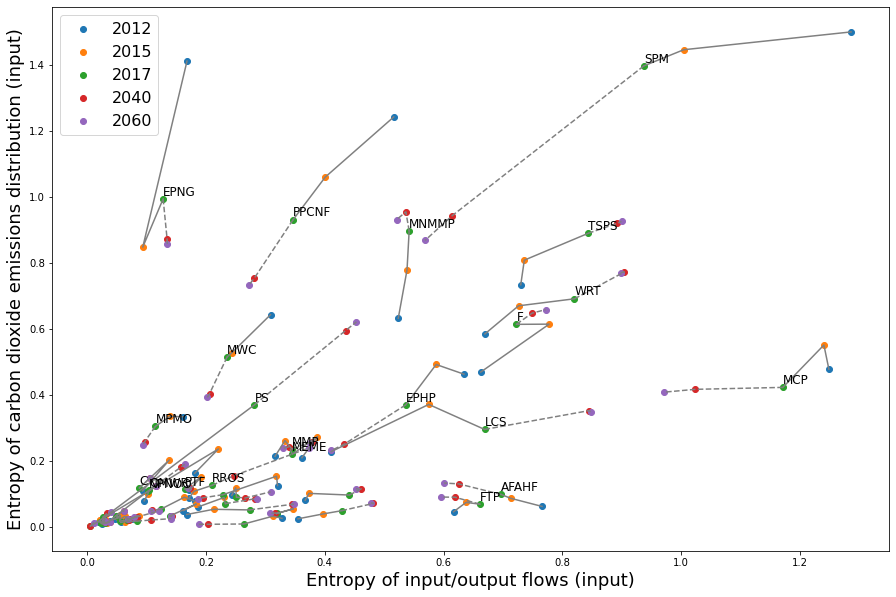

In [139]:
df2012in=[(X2012+Psi2012).sum(axis=1)[mans==el].sum() for el in range(42)]
df2012out=[(Xf2012+Psif2012).sum(axis=1)[mans==el].sum() for el in range(42)]
df2015in=[(X2015+Psi2015).sum(axis=1)[mans==el].sum() for el in range(42)]
df2015out=[(Xf2015+Psif2015).sum(axis=1)[mans==el].sum() for el in range(42)]
df2017in=[(X2017+Psi2017).sum(axis=1)[mans==el].sum() for el in range(42)]
df2017out=[(Xf2017+Psif2017).sum(axis=1)[mans==el].sum() for el in range(42)]
df2040in=[(X2040+Psi2040).sum(axis=1)[mans==el].sum() for el in range(42)]
df2040out=[(Xf2040+Psif2040).sum(axis=1)[mans==el].sum() for el in range(42)]
df2060in=[(X2060+Psi2060).sum(axis=1)[mans==el].sum() for el in range(42)]
df2060out=[(Xf2060+Psif2060).sum(axis=1)[mans==el].sum() for el in range(42)]
plt.figure(figsize=(15,10))
plt.scatter(df2012out,df2012in)
plt.scatter(df2015out,df2015in)
plt.scatter(df2017out,df2017in)
plt.scatter(df2040out,df2040in)
plt.scatter(df2060out,df2060in)
plt.legend([2012,2015,2017,2040,2060],fontsize=16)
for el in range(42):
    plt.plot([df2012out[el],df2015out[el],df2017out[el]],[df2012in[el],df2015in[el],df2017in[el]],color='gray')
    plt.plot([df2017out[el],df2040out[el],df2060out[el]],
             [df2017in[el],df2040in[el],df2060in[el]],'--',color='gray')
    if (df2017out[el]>0.5) | (df2017in[el]>0.1):
        plt.text(df2017out[el],df2017in[el]+0.01,industries[el],fontsize=12)
#for el in range(len(koef)):
#    if (koef[el]>0.005) | (mdl.coef_[0][el]>1.4e-6):
#        plt.text(mdl.coef_[0][el],koef[el]+1e-4,otr[el],fontsize=12)
        
plt.xlabel('Entropy of input/output flows (input)',fontsize=18)
plt.ylabel('Entropy of carbon dioxide emissions distribution (input)',fontsize=18)
plt.show()

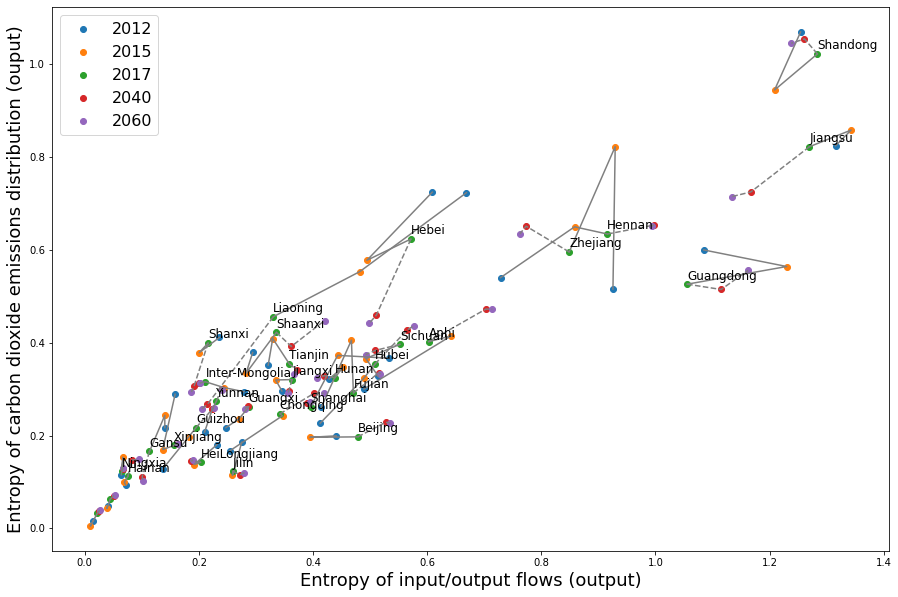

In [142]:
df2012in=[(X2012+Psi2012).sum(axis=0)[regions==el].sum() for el in range(31)]
df2012out=[(Xf2012+Psif2012).sum(axis=0)[regions==el].sum() for el in range(31)]
df2015in=[(X2015+Psi2015).sum(axis=0)[regions==el].sum() for el in range(31)]
df2015out=[(Xf2015+Psif2015).sum(axis=0)[regions==el].sum() for el in range(31)]
df2017in=[(X2017+Psi2017).sum(axis=0)[regions==el].sum() for el in range(31)]
df2017out=[(Xf2017+Psif2017).sum(axis=0)[regions==el].sum() for el in range(31)]
df2040in=[(X2040+Psi2040).sum(axis=0)[regions==el].sum() for el in range(31)]
df2040out=[(Xf2040+Psif2040).sum(axis=0)[regions==el].sum() for el in range(31)]
df2060in=[(X2060+Psi2060).sum(axis=0)[regions==el].sum() for el in range(31)]
df2060out=[(Xf2060+Psif2060).sum(axis=0)[regions==el].sum() for el in range(31)]
plt.figure(figsize=(15,10))
plt.scatter(df2012out,df2012in)
plt.scatter(df2015out,df2015in)
plt.scatter(df2017out,df2017in)
plt.scatter(df2040out,df2040in)
plt.scatter(df2060out,df2060in)
plt.legend([2012,2015,2017,2040,2060],fontsize=16)
for el in range(31):
    plt.plot([df2012out[el],df2015out[el],df2017out[el]],[df2012in[el],df2015in[el],df2017in[el]],color='gray')
    plt.plot([df2017out[el],df2040out[el],df2060out[el]],
             [df2017in[el],df2040in[el],df2060in[el]],'--',color='gray')
    if (df2017out[el]>0.5) | (df2017in[el]>0.1):
        plt.text(df2017out[el],df2017in[el]+0.01,nregions[el],fontsize=12)
#for el in range(len(koef)):
#    if (koef[el]>0.005) | (mdl.coef_[0][el]>1.4e-6):
#        plt.text(mdl.coef_[0][el],koef[el]+1e-4,otr[el],fontsize=12)
        
plt.xlabel('Entropy of input/output flows (output)',fontsize=18)
plt.ylabel('Entropy of carbon dioxide emissions distribution (ouput)',fontsize=18)
plt.show()

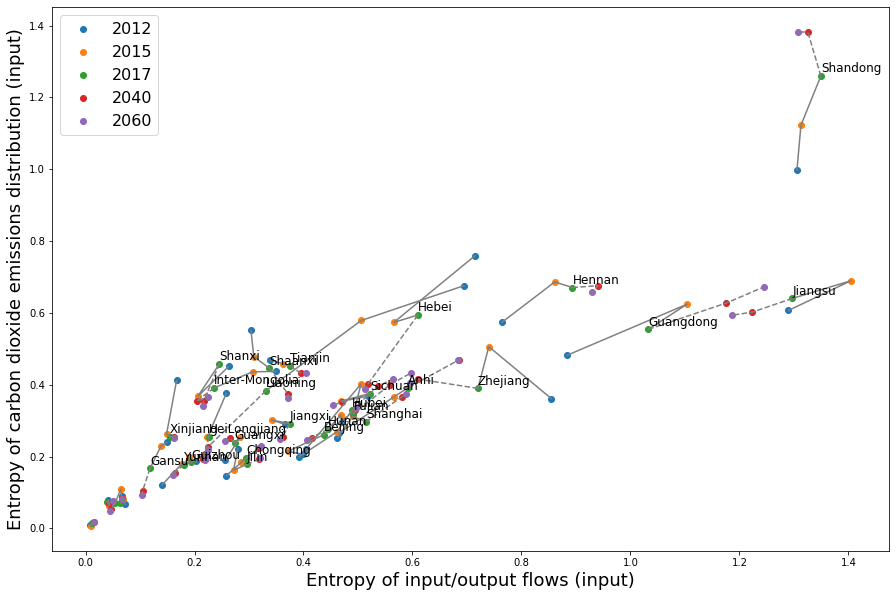

In [143]:
df2012in=[(X2012+Psi2012).sum(axis=1)[regions==el].sum() for el in range(31)]
df2012out=[(Xf2012+Psif2012).sum(axis=1)[regions==el].sum() for el in range(31)]
df2015in=[(X2015+Psi2015).sum(axis=1)[regions==el].sum() for el in range(31)]
df2015out=[(Xf2015+Psif2015).sum(axis=1)[regions==el].sum() for el in range(31)]
df2017in=[(X2017+Psi2017).sum(axis=1)[regions==el].sum() for el in range(31)]
df2017out=[(Xf2017+Psif2017).sum(axis=1)[regions==el].sum() for el in range(31)]
df2040in=[(X2040+Psi2040).sum(axis=1)[regions==el].sum() for el in range(31)]
df2040out=[(Xf2040+Psif2040).sum(axis=1)[regions==el].sum() for el in range(31)]
df2060in=[(X2060+Psi2060).sum(axis=1)[regions==el].sum() for el in range(31)]
df2060out=[(Xf2060+Psif2060).sum(axis=1)[regions==el].sum() for el in range(31)]
plt.figure(figsize=(15,10))
plt.scatter(df2012out,df2012in)
plt.scatter(df2015out,df2015in)
plt.scatter(df2017out,df2017in)
plt.scatter(df2040out,df2040in)
plt.scatter(df2060out,df2060in)
plt.legend([2012,2015,2017,2040,2060],fontsize=16)
for el in range(31):
    plt.plot([df2012out[el],df2015out[el],df2017out[el]],[df2012in[el],df2015in[el],df2017in[el]],color='gray')
    plt.plot([df2017out[el],df2040out[el],df2060out[el]],
             [df2017in[el],df2040in[el],df2060in[el]],'--',color='gray')
    if (df2017out[el]>0.5) | (df2017in[el]>0.1):
        plt.text(df2017out[el],df2017in[el]+0.01,nregions[el],fontsize=12)
#for el in range(len(koef)):
#    if (koef[el]>0.005) | (mdl.coef_[0][el]>1.4e-6):
#        plt.text(mdl.coef_[0][el],koef[el]+1e-4,otr[el],fontsize=12)
        
plt.xlabel('Entropy of input/output flows (input)',fontsize=18)
plt.ylabel('Entropy of carbon dioxide emissions distribution (input)',fontsize=18)
plt.show()